In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
plt.rcParams["figure.figsize"] = (16 / 3 * 2, 9 / 3 * 2)
plt.rcParams["font.size"] = 18

In [3]:
def flip_coins(tot_flips, p_heads, random_state=None):
    """
    Generate samples for coin flips.
    
    Parameters
    ----------
    tot_flips : int
    p_heads : float
        Probability of heads.  Values should be between [0, 1].
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
    Returns
    -------
    flip_sequence : np.array
        List of heads or tails.  Heads is 0; tail is 1.
    n_range : list of int
        List from 1 to tot_flips.
    run_prob : np.array
        Running probability for first n flips.
    """
    rng = sklearn.utils.check_random_state(random_state)
    flip_sequence = rng.binomial(1, p_heads, tot_flips)
    flip_sequence_str = [['H', 'T'][i] for i in flip_sequence]
    n_range = range(1, tot_flips + 1)
    run_prob = np.cumsum(flip_sequence) / n_range
    return flip_sequence, flip_sequence_str, n_range, run_prob

In [4]:
tot_flips, p_heads, random_state = 500, 0.5, 0
flip_sequence, flip_sequence_str, n_range, run_prob = flip_coins(500, 0.5, 0)

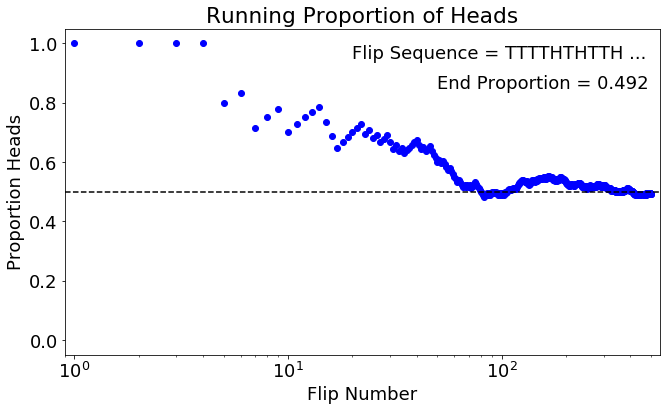

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(n_range, run_prob, "o", c="b")
ax.axhline(p_heads, ls='--', c='k')

ax.text(20, 0.95, f"Flip Sequence = {''.join(flip_sequence_str[:10])} ...")
ax.text(50, 0.85, f"End Proportion = {run_prob[-1]}")

ax.set_xlim(0.9, tot_flips+50)
ax.set_ylim(-0.05, 1.05)

ax.set_xscale("log")
ax.set_xlabel("Flip Number")
ax.set_ylabel("Proportion Heads")
ax.set_title("Running Proportion of Heads")

plt.show()